In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
X_train.shape

(105, 2)

In [8]:
X_test.shape

(45, 2)

In [9]:
#数据标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#fit(self, X[, y]) Compute the mean and std to be used for later scaling.
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
sc.scale_

array([ 1.79595918,  0.77769705])

In [11]:
#transform(self, X, copy=None) standardization by centering and scaling
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
#感知器
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
#ppn = Perceptron(max_iter=5)
#fit(self, X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [13]:
#coef_: array, share=[1, n_features] if n_classes == 2 else [n_classes, n_features]
#Weights assigned to the feature
ppn.coef_

array([[-0.14874662, -0.11229737],
       [ 0.22431308, -0.20230671],
       [ 0.50351128,  0.28717266]])

In [14]:
#intercept_array, shape = [1] if n_classes == 2 else [n_classes]
#Constants in decision function.
ppn.intercept_

array([-0.1, -0.1, -0.5])

In [15]:
y_pred = ppn.predict(X_test_std)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [16]:
type(y_pred == y_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [17]:
# 结合布尔型数组
# 以上这些方法还可以结合布尔型数组来使用。因为，在这些方法中，布尔值会被强制转换为0和1
# any 用于测试数组是否存在True
# all 用于测试数组是否全是True
print('Misclassified samples: %d' %(y_test != y_pred).sum())

Misclassified samples: 4


In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
#import pdb


def versiontuple(v):
    #map()它接收一个函数f和一个可迭代对象(这里理解成 list)，并通过把函数f依次作用在list的每个元素上，得到一个新的list并返回。
    #此函数的作用是将字符串list转化为int元组
    return tuple(map(int, (v.split("."))))
#绘制决策边界
def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.02):
    
    # setup marker generator and color map
    #pdb.set_trace()
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    #np.meshgrid
    #Return coordinate matrices from coordinate vectors.
    #meshgrid is very useful to evaluate functions on a grid.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #numpy.ravel(a, order='C')
    #Return a contiguous flattened array.
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #contourf 画等高线
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = cmap)
    #plt.xlim 设置x轴的数值显示范围
    plt.xlim(xx1.min(), xx1.max())
    #plt.ylim 设置y轴的数值显示范围
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                   alpha = 0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    if test_idx:

        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')                                    
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                   X_test[:,1],
                   alpha=0.15,
                   linewidths=2,
                   marker = '^',
                   edgecolors = 'black',
                   facecolors='none',
                   s=55,
                   label='test set')
            
        

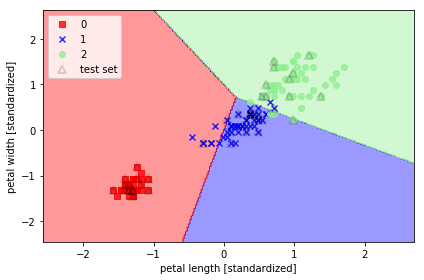

In [23]:
%matplotlib inline
#pdb.set_trace()
#np.vstack:按垂直方向（行顺序）堆叠数组构成一个新的数组
X_combined_std = np.vstack((X_train_std, X_test_std))
#np.hstack:按水平方向（列顺序）堆叠数组构成一个新的数组
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

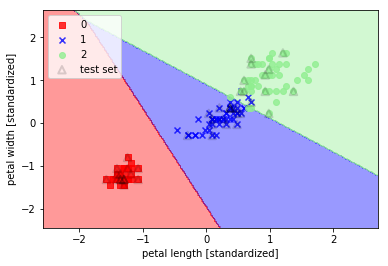

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

In [22]:
lr.predict_proba(X_test_std[0, :].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

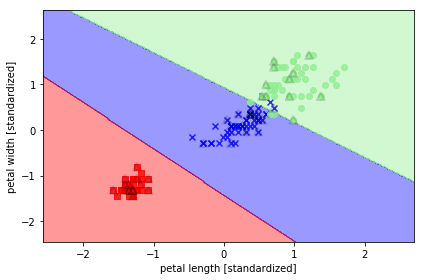

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state = 0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

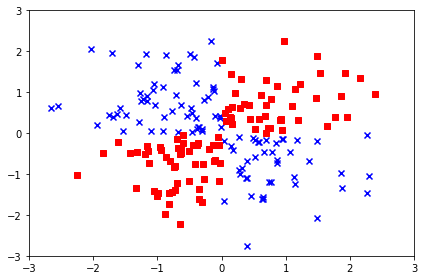

In [24]:
#SVM核函数完成非线性切分
import matplotlib.pyplot as plt
import numpy as np

#原来每次运行代码时设置相同的seed，则每次生成的随机数也相同，如果不设置seed，则每次生成的随机数都会不一样
#seed( ) 用于指定随机数生成时所用算法开始的整数值。
np.random.seed(0)
#randn函数返回一个或一组样本，具有标准正态分布
X_xor = np.random.randn(200,2)
#numpy.logical_not(x1，x2) 返回X1和X2异或逻辑后的布尔值
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0  )
#np.where(condition, x, y)
#满足条件(condition)，输出x，不满足输出y
y_xor = np.where(y_xor, 1, -1)

#scatter 创建散点图
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1], 
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1], 
           c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.tight_layout()
plt.show()

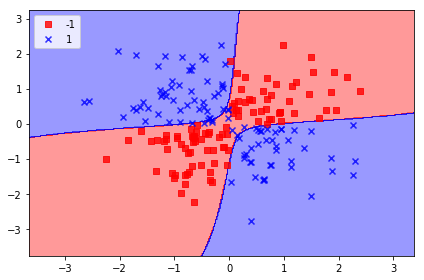

In [28]:
#使用kernal trick在高维空间内找到一个可切分的超平面
svm = SVC(kernel='rbf', random_state = 0, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

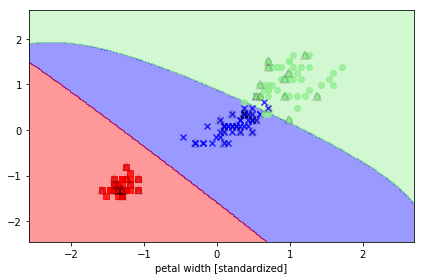

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.tight_layout()
plt.show()

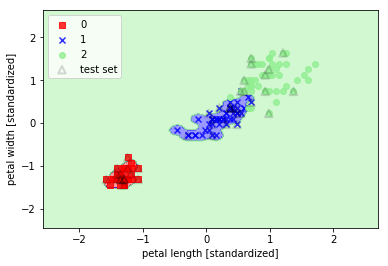

In [35]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

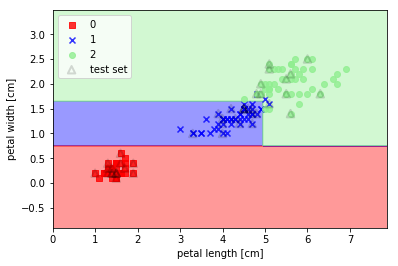

In [38]:
#决策树模型完成分类
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [39]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

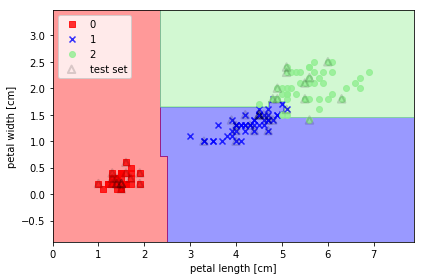

In [41]:
#树模型集成与随机森林
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

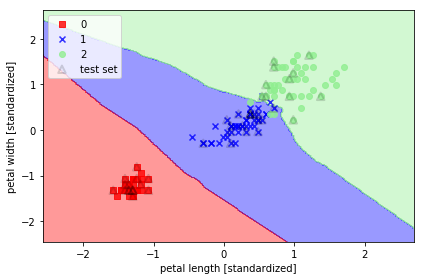

In [42]:
#K近邻算法
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()